In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# 케라스 모델 구성
import tensorflow as tf 
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.initializers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend,activations
from keras.callbacks import EarlyStopping, ModelCheckpoint

# 모델 저장
from keras.models import load_model

Using TensorFlow backend.


# 설정 변수 정의

## 작업 Directory 설정

In [2]:
# 학습 데이터 파일명
train_list_file = "/src/data/crack/Cracks/resize/imgs_crack_train.npy"
# 라벨 데이터 파일명
label_list_file = "/src/data/crack/Cracks/resize/labels_crack_train.npy"
# 분석 모델 디렉토리명
model_dir = "/src/hyebin/model/TEST/KERAS-TEST-1"

# 분석을 위한 함수 생성 

## 손실 함수 정의

In [3]:
def customLoss(label, pred):

    diff = abs(label-pred)  # abs : 절대값 return 
    weight = 0.97

    # Step 함수를 이용한 가중치 설정
    loss = backend.mean((backend.sign(activations.relu(diff)) * weight + 1) * backend.square(diff))
    
    return loss

## 분석 결과 시각화 함수

In [4]:
def showResult(image, pred, label):
    
    # pyplot의 현재 전체 이미지 크기를 백업 후 설정함
    tmp_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = (15,7)  # 너비, 높이 (in)
    
    # 원본 데이터 출력
    plt.subplot(1,3,1)  # 한 번에 여러 그래프 출력
    plt.imshow(image.reshape([512,512]), cmap='gray')
    plt.axis('off')
    
    # 예측 데이터 출력
    plt.subplot(1,3,2)
    plt.imshow(pred.reshape([512,512]), cmap='gray')
    plt.axis('off')
    
    # 라벨 데이터 출력
    plt.subplot(1,3,3)
    plt.imshow(label.reshape([512,512]), cmap='gray')
    plt.axis('off')  

    plt.show()
    plt.close()
    
    # 백업된 pyplot 이미지 크기를 복원함
    plt.rcParams["figure.figsize"] = tmp_size

# 분석 수행

## 데이터 로딩
<데이터 구조><br>
train_list : 정상 이미지 + 균열 (이미지 개수,512, 512, 1)<br>
label_list : 균열 라벨 이미지 (이미지 개수, 512, 512, 1)

In [5]:
print("load train data: ", train_list_file) 
train_list = np.load(train_list_file, allow_pickle=True)
print("load complete")

print("load train label data: ", label_list_file)
label_list = np.load(label_list_file, allow_pickle=True)
print("load complete")

print(train_list.shape)
print(label_list.shape)

load train data:  /src/data/crack/Cracks/resize/imgs_crack_train.npy
load complete
load train label data:  /src/data/crack/Cracks/resize/labels_crack_train.npy
load complete
(2924, 512, 512, 1)
(2924, 512, 512, 1)


## 모델 로딩

In [6]:
model = load_model(model_dir, custom_objects={'customLoss':customLoss})
print("load complete")

## 분석 진행

In [7]:
predict_list = model.predict(train_list)
print("analysis complete")

# 분석 결과 시각화

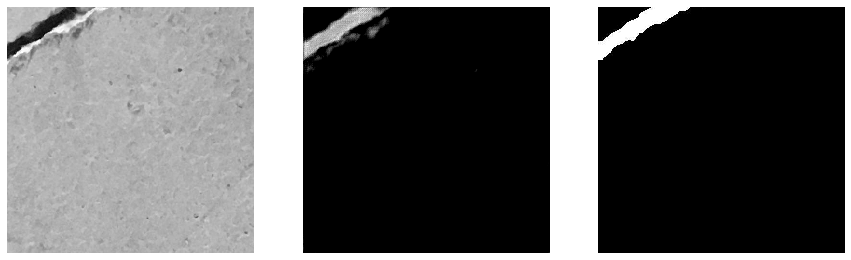

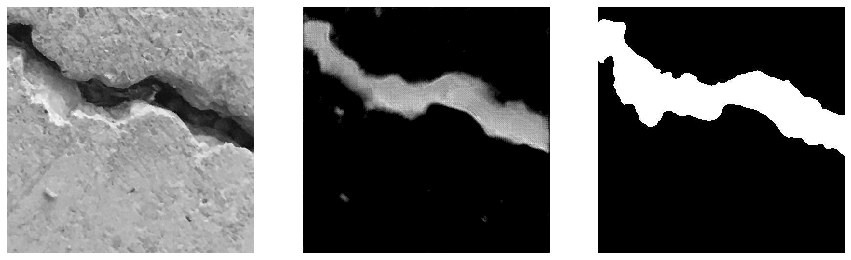

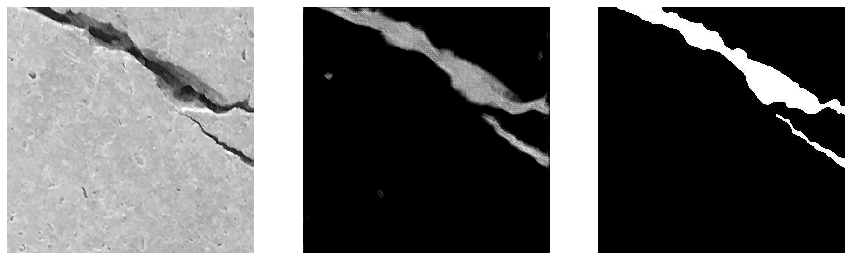

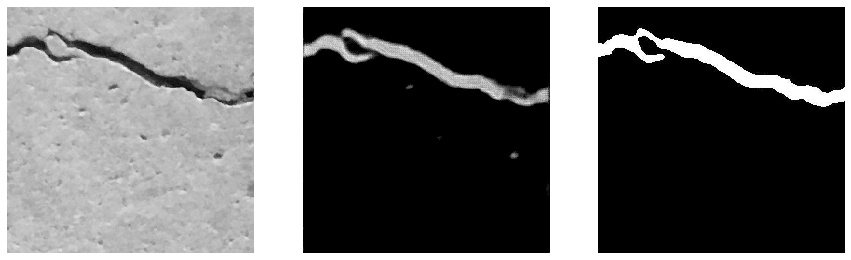

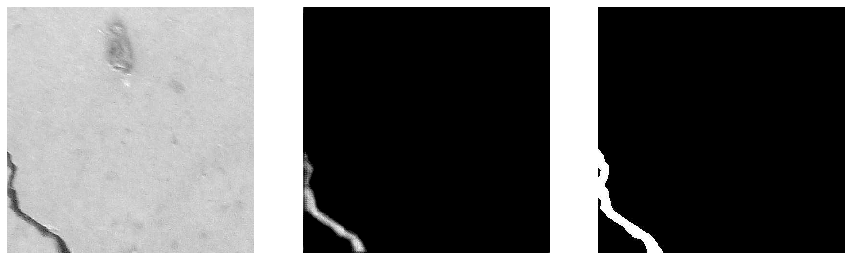

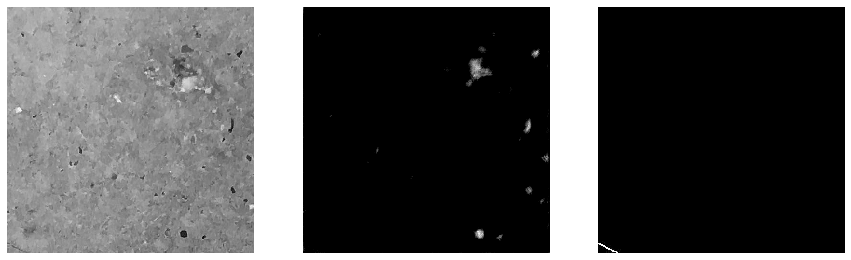

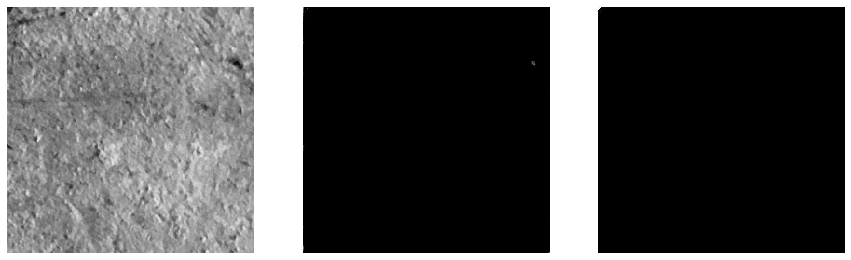

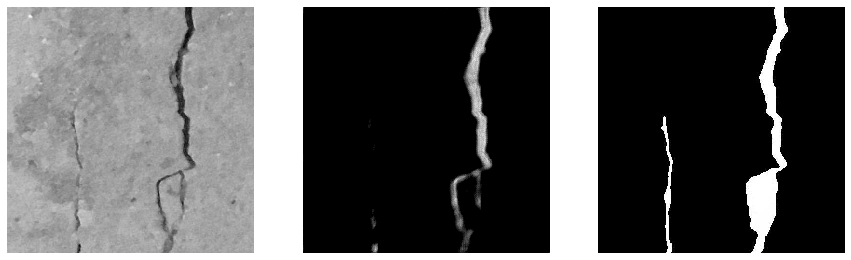

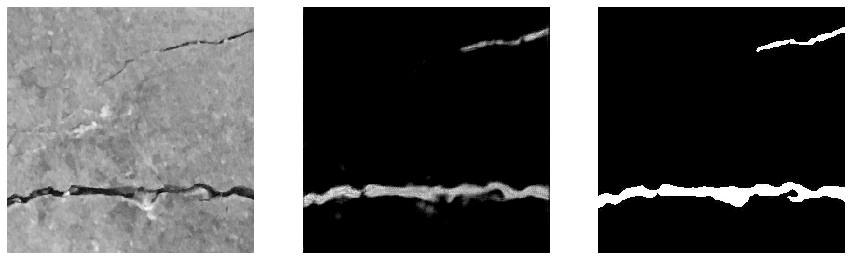

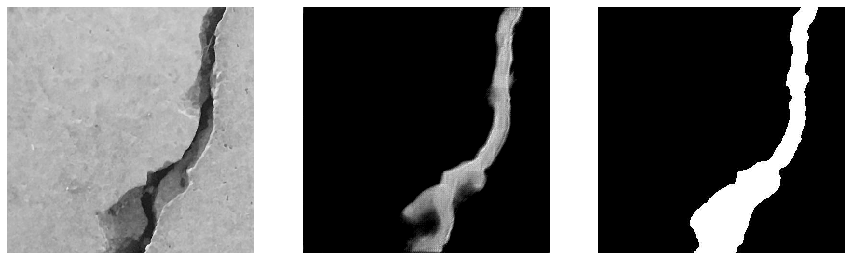

In [8]:
for i in range(10):
    showResult(train_list[i], predict_list[i], label_list[i])